In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA
import scipy

In [2]:
l1 = np.random.normal(size=100000)
l2 = np.random.normal(size=100000)

latents = np.array([l1, l1*0.5, l1*0.25, l2*0.5]).T
X = latents + np.random.normal(size=4 * 100000).reshape((100000, 4))*0.5
Y = latents + np.random.normal(size=4 * 100000).reshape((100000, 4))*0.5

X = X-X.mean(axis=0)
Y = Y-Y.mean(axis=0)

In [3]:
cca = CCA(n_components=1)
cca.fit(X, Y)
X_c, Y_c = cca.transform(X, Y)
cca_corr = np.corrcoef(X_c.T,Y_c.T)[1,0]

In [4]:
V = np.random.randn(4,1)
V,_ = np.linalg.qr(V, mode='reduced')

eta = 0.000005
corr_list = []
c11_inv_sqrt = np.zeros((4,4))
c22_inv_sqrt = np.zeros((4,4))

for j in range(99):
    for i in range(1000):
        
        ind = j*500+i
        x = X[ind:ind+4,:]
        y = Y[ind:ind+4,:]
        
        c12 = x.T@y
        c11 = x.T@x
        c22 = y.T@y

        c11_inv_sqrt = (scipy.linalg.inv(scipy.linalg.sqrtm(c11))+c11_inv_sqrt*ind)/(ind+1)
        c22_inv_sqrt = (scipy.linalg.inv(scipy.linalg.sqrtm(c22))+c22_inv_sqrt*ind)/(ind+1)

        R = c11_inv_sqrt@c12@c22_inv_sqrt
        V += eta*R.T@R@V
        V,_ = np.linalg.qr(V, mode='reduced')
    
    a = c11_inv_sqrt@V
    b = c22_inv_sqrt@V
    X_s = X@a
    Y_s = Y@b
    
    corr_list.append(np.corrcoef(X_s.T,Y_s.T)[1,0])

In [5]:
c12 = X.T@Y
c11 = X.T@X
c22 = Y.T@Y

c11_inv_sqrt = scipy.linalg.inv(scipy.linalg.sqrtm(c11))
c22_inv_sqrt = scipy.linalg.inv(scipy.linalg.sqrtm(c22))

R = c11_inv_sqrt@c12@c22_inv_sqrt
eigenvalue,eigenvector = np.linalg.eig(R.T@R)

eigenvalue = abs(eigenvalue)
m = max(eigenvalue)
ind = list(eigenvalue).index(m)

a_t = c11_inv_sqrt@eigenvector[:,ind]
a_t = a_t.reshape((len(a_t),1))/np.linalg.norm(a_t)
b_t = c22_inv_sqrt@eigenvector[:,ind]
b_t = b_t.reshape((len(b_t),1))/np.linalg.norm(b_t)

X_t = X@a_t
Y_t = Y@b_t

my_cca_corr = np.corrcoef(X_t.T,Y_t.T)[1,0]

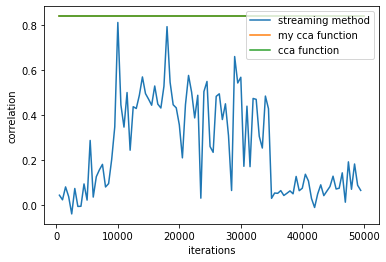

In [6]:
plt.plot(np.array(list(range(1,100)))*500,corr_list,label='streaming method')
plt.plot([500,50000],[my_cca_corr,my_cca_corr],label='my cca function')
plt.plot([500,50000],[cca_corr,cca_corr],label='cca function')
plt.xlabel('iterations')
plt.ylabel('correlation')
plt.legend()
plt.show()

In [7]:
cca.x_weights_

array([[ 9.46646546e-01],
       [ 2.98411472e-01],
       [ 1.21698942e-01],
       [-5.27143799e-04]])

In [8]:
a

array([[-1.7235521 ],
       [ 6.40359117],
       [-9.42011745],
       [ 1.53170271]])

In [9]:
a_t

array([[ 0.87022753],
       [ 0.43909863],
       [ 0.22335169],
       [-0.00323406]])

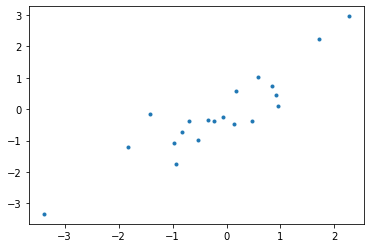

In [10]:
plt.plot(X[:20,:]@cca.x_weights_,Y[:20,:]@cca.y_weights_,'.')

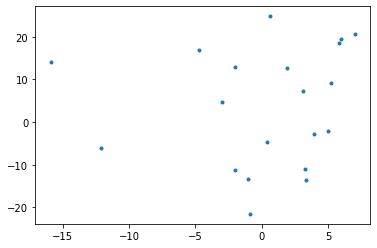

In [11]:
plt.plot(X[:20,:]@a,Y[:20,:]@b,'.')

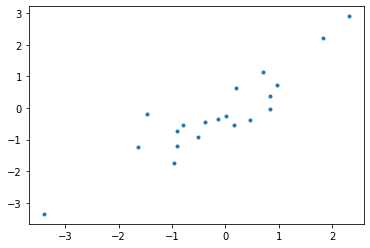

In [12]:
plt.plot(X[:20,:]@a_t,Y[:20,:]@b_t,'.')

In [13]:
V

array([[-0.28660969],
       [ 0.49609495],
       [-0.75582805],
       [ 0.31696788]])

In [14]:
eigenvector

array([[ 0.87210972, -0.00178496, -0.47355255,  0.12316428],
       [ 0.43661421, -0.00343322,  0.86676917,  0.24097188],
       [ 0.22087948,  0.00377947,  0.15638675, -0.96267396],
       [-0.0022209 , -0.99998537, -0.0015395 , -0.00468562]])

In [15]:
c11_inv_sqrt

array([[ 3.42412684e-03, -1.44178318e-03, -7.25320114e-04,
        -1.41195937e-06],
       [-1.44178318e-03,  5.60546385e-03, -3.69887971e-04,
         9.13767146e-06],
       [-7.25320114e-04, -3.69887971e-04,  6.14724448e-03,
        -4.44604449e-06],
       [-1.41195937e-06,  9.13767146e-06, -4.44604449e-06,
         4.47528636e-03]])